In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import duckdb as db
import pandas as pd
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# pd.set_option('display.width', 2000)
# pd.set_option('display.float_format', '{:20,.2f}'.format)
# pd.set_option('display.max_colwidth', None)

C:\Users\AshishJakkam\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Python and SQL - Workflow Analysis


In [2]:
df_StpFcEntries = pd.read_excel('Tech_Datasets2024\StpFcEntries.xlsx')
df_contractPaths = pd.read_excel('Tech_Datasets2024\contractPaths.xlsx')
df_WorkflowTaskInfo = pd.read_excel('Tech_Datasets2024\WorkflowTaskInfo.xlsx')

In [23]:
df_WorkflowTaskInfo.head()

,time_stamp_date,time_stamp_time,status_taken,status_date,status_time,reference_id,body_count,code,description,workflow_id,mode_timeout,category_code,type_code,flow_code,resend,mw_sheet_id,group_id,subprocess_id,xml_ra,xml_lu,xml_lz,xml,reference_id-2,body_reference_id,code-2,input_output,filter_code,lost_data,datasource_code,system_error,body_document_id
0,2012-08-07,1970-01-01 15:06:25,N,2012-08-07,1970-01-01 15:06:25,8586,1,P_COM_FInit-A,P_COM_FInit-A,829,0,Distribution,MX_Completion,META_MX_COM_P,N,1012,0,0,0,390,0,binary data,8586,0,Input,I,8687,N,DIST_ENTRY_SPACE,N,7034
1,2012-08-07,1970-01-01 15:06:25,N,2012-08-07,1970-01-01 15:06:25,8586,1,P_COM_FInit-A,P_COM_FInit-A,829,0,Distribution,MX_Completion,META_MX_COM_P,N,1012,0,0,0,390,0,binary data,8586,1,Output,O,8688,N,DIST_ENTRY_SPACE,N,7035
2,2012-08-07,1970-01-01 15:07:17,N,2012-08-07,1970-01-01 15:07:17,8587,1,P_FXMM_FInit-A_2,P_FXMM_FInit-A_2,829,0,Distribution,MX_Completion,META_MX_CORE_P,N,1113,0,0,0,390,0,binary data,8587,0,Input,I,8689,N,DIST_ENTRY_SPACE,N,7036
3,2012-08-07,1970-01-01 15:07:17,N,2012-08-07,1970-01-01 15:07:17,8587,1,P_FXMM_FInit-A_2,P_FXMM_FInit-A_2,829,0,Distribution,MX_Completion,META_MX_CORE_P,N,1113,0,0,0,390,0,binary data,8587,1,Output,O,8690,N,DIST_ENTRY_SPACE,N,7037
4,2012-08-07,1970-01-01 15:08:03,N,2012-08-07,1970-01-01 15:08:03,8588,1,P_CRD_FInit-A,P_CRD_FInit-A,829,0,Distribution,MX_Completion,META_MX_CRD_P,N,810,0,0,0,390,0,binary data,8588,0,Input,I,8691,N,DIST_ENTRY_SPACE,N,7038


In [24]:
df_contractPaths.head()

,fc_id
0,1164
1,121
2,1433
3,65
4,1699


In [25]:
# print(df_StpFcEntries.columns)
df_StpFcEntries.head()

,ts_time_long,wait_time,proc_time,status_taken,status_time_long,reference_id,body_count,xmlflow_uid,xmlflow_family_id,xmlflow_status,xmlflow_workflow_id,stp_status,stp_status1,stp_status2,stp_status3,stp_status4,stp_status_path,stp_status_validation_level,job_class_id,job_contact,job_date,job_description,job_description_label,job_time,source_event_class_id,source_event_view,stp_last_validation_date,stp_last_validation_time,stp_last_validator,stp_last_validator_group,stp_udf0,stp_udf1,stp_udf2,stp_udf3,stp_udf4,stp_udf5,stp_udf6,stp_udf7,stp_udf8,stp_udf9,target_class_id,target_date,target_description,target_entity,target_id,target_legal_entity,target_priority,target_processing_entity,target_stream_type,target_time,xmlflow_error_type,xmlflow_request_id,xmlflow_answer_queue_id,xmlflow_answer_queue_param,ctp_hierarchy,ctp_label,ctp_type,fc_cfamily,fc_cgroup,fc_ci_flag,fc_cid,fc_ctype,fc_destination_section,fc_id,fc_trade_purpose,fc_internal_external,fc_last_event_action,fc_last_event_class_id,fc_last_event_id,fc_origin_event_action,fc_origin_event_class_id,fc_origin_id,fc_package_id,fc_package_method,fc_portfolio,fc_portfolio_dst,fc_si_flag,fc_source_section,fc_typology,fc_version,fop_initiator_role,fop_initiator_user,fop_initiator_group,fop_issuer_role,fop_issuer_user,fop_issuer_group,fop_sales,fop_sales_group,fop_trader,fop_trader_group,fop_sales_assistant,fop_sales_assistant_group,fop_trader_assistant,fop_trader_assistant_group,fop_internal_trader,fop_internal_trader_group,fc_maturity_date,fc_shore,stp_doc_status,stp_doc_last_validator,fofoureye,bofoureye,val_mode,total_trials,chasing_trials,last_chasing_date,last_chasing_phase,next_chasing_date,chasing_init,chasing_com,last_manual_chasing_tool,chasing_details
0,1684420000000,5,6,Y,1684420000000,244,0,1533820000000,1,31314,108,,,,,,A,EventPending,,,2023-05-18,Trade Insertion,PendDocUpdate,1970-01-01 16:50:00,,ALL,2023-05-18 00:00:00,1970-01-01 16:50:00,MUREXFO,,,,,,,,,,,,1.238,2016-05-18,"USD/EUR*10000_ S_ EUR_ 1,000,000.00_ 21/11/16 ...",CE,25,MUREX,0,,,1970-01-01 16:50:00,,0,0,,,CRP1[INC](NBIC_NET_CNF_MLTUSDSI),,CURR,OPT,Y,36,ASN,,25,Contract,E,1,,0,1,,25,0,,CM_FXD_VAN,1177,Std,FVTPL,Average Asian FXD,1,PRV,MUREXFO,FO_FXO,PRV,MUREXFO,FO_FXO,,,,,,,,,,,2016-11-17,,,,,,,,,,,,,,,
1,1684420000000,4637,649,Y,1684420000000,1,1,1533820000000,1,31313,108,,,,,,,EventPending,,,2023-05-18,,PendDocUpdate,1970-01-01 16:50:00,,ALL,2023-05-18 16:50:00,2023-05-18 16:50:00,,,,,,,,,,,,,1.526,2016-05-18,"USD/EUR*10000_ B_ EUR_ 1,000,000.00_ 22/08/16 ...",CE,17,1010,0,,,1970-01-01 16:50:00,,0,0,,,CRP1[INC](NBIC_NET_CNF_MLTUSDSI),,CURR,OPT,Y,16,SMP,,17,Contract,E,1,,0,1,,17,0,,CM_FXD_VAN,1177,Std,FVTPL,Straddle FXD,1,PRV,MUREXFO,FO_FXO,PRV,MUREXFO,FO_FXO,,,,,,,,,,,2016-08-18,,,,,,,,,,,,,,,
2,1684420000000,1134,6,Y,1684420000000,20,1,1533820000000,1,31313,108,,,,,,,EventPending,,,2023-05-18,,PendDocUpdate,1970-01-01 16:51:00,,ALL,2023-05-18 16:51:00,2023-05-18 16:51:00,,,,,,,,,,,,,1.238,2016-05-18,"USD/EUR*10000_ S_ EUR_ 1,000,000.00_ 22/08/16 ...",CE,36,1010,0,,,1970-01-01 16:51:00,,0,0,,,CRP1[INC](NBIC_NET_CNF_MLTUSDSI),,CURR,OPT,Y,47,SMP,,36,Contract,E,1,,0,1,,36,0,,CM_FXD_VAN,1177,Std,FVTPL,Vanilla Option FXD,1,PRV,MUREXFO,FO_FXO,PRV,MUREXFO,FO_FXO,,,,,,,,,,,2016-08-18,,,,,,,,,,,,,,,
3,1684420000000,41,396,Y,1684420000000,102,0,1533820000000,1,31314,108,,,,,,A,EventPending,,,2023-05-18,Trade Insertion,PendDocUpdate,1970-01-01 16:50:00,,ALL,2023-05-18 00:00:00,1970-01-01 16:50:00,MUREXFO,,,,,,,,,,,,1.526,2016-05-18,"USD/EUR*10000_ B_ EUR_ 1,000,000.00_ 22/08/16 ...",CE,17,MUREX,0,,,1970-01-01 16:50:00,,0,0,,,CRP1[INC](NBIC_NET_CNF_MLTUSDSI),,CURR,OPT,Y,16,SMP,,17,Contract,E,1,,0,1,,17,0,,CM_FXD_VAN,1177,Std,FVTPL,Straddle FXD,1,PRV,MUREXFO,FO_FXO,PRV,MUREXFO,FO_FXO,,,,,,,,,,,2016-08-18,,,,,,,,,,,,,,,
4,1684420000000,2,11,Y,1684420000000,250,0,1533820000000,1,31188,108,,,,,,,Initial,,,2023-05-18,Trade Insertion,PendDocUpdate,1970-01-01 16:50:00,,ALL,2023-05-18 00:00:00,1970-01-01 16:50:00,MUREXF

### Q2

#### Summarize the data by Family, Group and Type and output the number of contracts (not entries) that were processed by the contract workflow. 

Print the relevant columns:

In [26]:
df1 = df_StpFcEntries[['status_taken', 'xmlflow_status', 'fc_cfamily', 'fc_cgroup', 'fc_ctype']]
df1

,status_taken,xmlflow_status,fc_cfamily,fc_cgroup,fc_ctype
0,Y,31314,CURR,OPT,ASN
1,Y,31313,CURR,OPT,SMP
2,Y,31313,CURR,OPT,SMP
3,Y,31314,CURR,OPT,SMP
4,Y,31188,CURR,OPT,ASN
...,...,...,...,...,...
35021,Y,31210,EQD,EQUIT,
35022,Y,31436,EQD,EQUIT,
35023,Y,31420,EQD,EQUIT,
35024,N,31403,EQD,EQUIT,


Find the entries that have been processed:

In [27]:
df1[df1['status_taken'].str.contains('Y')]

,status_taken,xmlflow_status,fc_cfamily,fc_cgroup,fc_ctype
0,Y,31314,CURR,OPT,ASN
1,Y,31313,CURR,OPT,SMP
2,Y,31313,CURR,OPT,SMP
3,Y,31314,CURR,OPT,SMP
4,Y,31188,CURR,OPT,ASN
...,...,...,...,...,...
35019,Y,31200,EQD,EQUIT,
35020,Y,31205,EQD,EQUIT,
35021,Y,31210,EQD,EQUIT,
35022,Y,31436,EQD,EQUIT,


Finding Unique Values in a Pandas Dataframe
To find unique values in a Pandas dataframe, we can use the unique() function. This function returns an array of unique values in the dataframe. However, this function only returns unique values within a particular column or row. 

In [28]:
unique_contracts = df1['xmlflow_status'].unique()

print(unique_contracts)
print("Number of contracts processed by the contract workflow = ", len(unique_contracts))


[31314 31313 31188 31289 31285 31151 31311 31273 31261 31185 31199 31181
 31154 31157 31163 31215 31205 31200 31403 31210 31424 31430 31436 31421
 31147 31232 31144 31123 31138 31150 31420 31126 31122 31118 31115 31121
 31141 31385 31399 31391 31328 31333 31354 31324 31355 31366 31358 31323
 31362 31332 31339 31382 31241 31211 31457 31248 31460 31322 31251 31463
 31245 31221 31431 31455 31191 31379 31363 31194 31226 31295 31409 31236
 31229 31378 31288 31307 31284 31365 31334 31304 31257 31280 31303 31184
 31168 31173 31164 31180 31172 31130 31134 31119 31346 31359 31341 31343
 31419 31453 31467 31254 31277 31281 31301 31413 31394 31376 31396 31318
 31395 31198 31347 31351 31316 31169 31177 31176]
Number of contracts processed by the contract workflow =  116


### Q3

#### Output the following statistics per task:

Q3a) Wait-time Average

Q3a.1) First make a dataframe with the needed data:

In [29]:
df2 = df_StpFcEntries[['status_taken', 'wait_time', 'xmlflow_status']]
df2 = df2[df2['status_taken'].str.contains('Y')]
df2 = df2[['xmlflow_status', 'wait_time']]
df2


,xmlflow_status,wait_time
0,31314,5
1,31313,4637
2,31313,1134
3,31314,41
4,31188,2
...,...,...
35019,31200,56
35020,31205,5
35021,31210,5
35022,31436,4


Q3a.2) Combine/Add the wait times of entries under the same task.

In [30]:
# Add the wait times of the entries under the same task

# To calculate the average we need to know the number of entries per task.
# To do this create an extra column of 1s. This is done so that when the row with 
# the same task are added together, we can see how many entries there were per task.

# Using DataFrame.insert() to add a column
df2.insert(2, "Ones", np.ones(df2.shape[0]), True)
print(df2.head())

df_waitTimePerTask = df2.groupby('xmlflow_status').sum()
df_waitTimePerTask

   xmlflow_status  wait_time  Ones
0           31314          5   1.0
1           31313       4637   1.0
2           31313       1134   1.0
3           31314         41   1.0
4           31188          2   1.0


,wait_time,Ones
xmlflow_status,,
31115,513,221.0
31118,1024,217.0
31119,9,4.0
31121,2032,124.0
31122,566,221.0
...,...,...
31455,44,14.0
31457,100,34.0
31460,255,44.0


Q3a.3) Calculate the Average wait time *per task*

In [31]:
df_AverageWaitTimePerTask = df_waitTimePerTask['wait_time']/df_waitTimePerTask['Ones']
df_AverageWaitTimePerTask

xmlflow_status
31115     2.321267
31118     4.718894
31119     2.250000
31121    16.387097
31122     2.561086
           ...    
31455     3.142857
31457     2.941176
31460     5.795455
31463     2.363636
31467    -1.000000
Length: 115, dtype: float64

plot histogram to view outliers

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


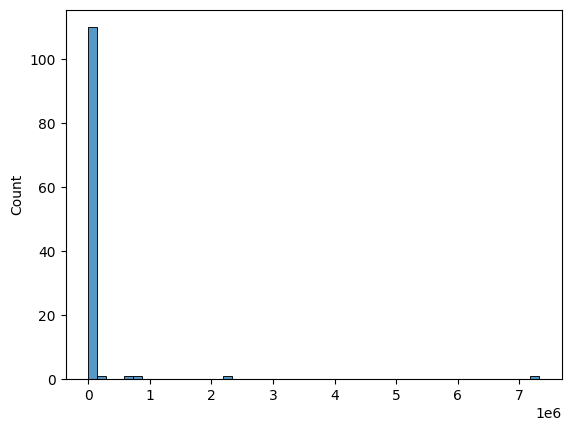

In [32]:
sns.histplot(data= df_AverageWaitTimePerTask, bins=50)
plt.show()

Q3b) Max Wait time *per task*

In [33]:
df_MaxWaitTimePerTask = df2.groupby('xmlflow_status').max()

df_MaxWaitTimePerTask



,wait_time,Ones
xmlflow_status,,
31115,38,1.0
31118,339,1.0
31119,3,1.0
31121,287,1.0
31122,48,1.0
...,...,...
31455,12,1.0
31457,20,1.0
31460,35,1.0


Q3c) Average Processing Time *per task*

Q3c.1) First make a dataframe with the needed data:

In [34]:
df_processingTimes = df_StpFcEntries[['status_taken', 'proc_time', 'xmlflow_status']]
df_processingTimes = df_processingTimes[df_processingTimes['status_taken'].str.contains('Y')]
df_processingTimes = df_processingTimes[['xmlflow_status', 'proc_time']]
df_processingTimes

,xmlflow_status,proc_time
0,31314,6
1,31313,649
2,31313,6
3,31314,396
4,31188,11
...,...,...
35019,31200,2
35020,31205,40
35021,31210,68
35022,31436,1255


Q3c.2) Combine/Add the Processing times of entries under the same task.

In [35]:
# Add the processing times of the entries under the same task

# To calculate the average we need to know the number of entries per task.
# To do this create an extra column of 1s. This is done so that when rows with 
# the same task number are added together, the ones will be added together and we can see how many entries there were per task.

# Using DataFrame.insert() to add a column
df_processingTimes.insert(2, "Ones", np.ones(df_processingTimes.shape[0]), True)
print(df_processingTimes.head())

df_ProcTimePerTask = df_processingTimes.groupby('xmlflow_status').sum()
df_ProcTimePerTask

   xmlflow_status  proc_time  Ones
0           31314          6   1.0
1           31313        649   1.0
2           31313          6   1.0
3           31314        396   1.0
4           31188         11   1.0


,proc_time,Ones
xmlflow_status,,
31115,231,221.0
31118,2469,217.0
31119,135,4.0
31121,1591,124.0
31122,1588,221.0
...,...,...
31455,72,14.0
31457,681,34.0
31460,137,44.0


Q3c.3) Calculate the Average proc time *per task*

In [40]:
df_AverageProcTimePerTask = df_ProcTimePerTask['proc_time']/df_waitTimePerTask['Ones']
df_AverageProcTimePerTask

xmlflow_status
31115     1.045249
31118    11.377880
31119    33.750000
31121    12.830645
31122     7.185520
           ...    
31455     5.142857
31457    20.029412
31460     3.113636
31463    13.318182
31467    -1.000000
Length: 115, dtype: float64

Q3d) Processing Time Max

In [41]:
df_MaxProcTimePerTask = df_ProcTimePerTask.groupby('xmlflow_status').max()

df_MaxProcTimePerTask

,proc_time,Ones
xmlflow_status,,
31115,231,221.0
31118,2469,217.0
31119,135,4.0
31121,1591,124.0
31122,1588,221.0
...,...,...
31455,72,14.0
31457,681,34.0
31460,137,44.0


e) Throughput (per second)